# Exploring Dandiset 000690: Visual Processing from Thalamus to Hippocampus in Mouse Brain

**Note**: This notebook was generated with AI assistance. Please review code and results carefully before use.

## Overview
This Dandiset ([000690](https://dandiarchive.org/dandiset/000690/0.250326.0015)) investigates how visual information is processed along the neural pathway from thalamus to hippocampus in mice. The experiments recorded neural activity using Neuropixels probes while presenting various visual stimuli, including:
- Simple moving bars with different parameters (width, speed, contrast)
- Complex natural movies featuring eagles and squirrels

The recordings span multiple brain regions including LGN, V1, higher visual areas, and hippocampus.

## What this notebook covers
- Loading and accessing the Dandiset using the DANDI API
- Exploring the structure of the NWB files
- Analyzing and visualizing LFP data
- Working with electrode metadata

## Required Packages

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient

## Accessing the Dandiset

In [2]:
# Initialize DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# List some available NWB files
asset_list = list(dandiset.get_assets_by_glob("sub-*/sub-*_probe-*_ecephys.nwb"))
print("First few NWB files:")
for asset in asset_list[:5]:
    print(f"- {asset.path}")

First few NWB files:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-1_ecephys.nwb


## Loading and Exploring an NWB File

In [3]:
# Load a sample NWB file (probe 4 from subject 692077)
url = next(dandiset.get_assets_by_glob("sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb")).download_url

# Open the file using remfile to stream without downloading
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Examining Recording Metadata

In [4]:
# Print basic session information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age} ({nwb.subject.age_in_days} days)")
print(f"Sex: {nwb.subject.sex}")
print(f"Session ID: {nwb.session_id}")
print(f"Session Start: {nwb.session_start_time}")

Subject ID: 692077
Age: P89D (89.0 days)
Sex: F
Session ID: 1300222049
Session Start: 2023-09-28 00:00:00-07:00


## Exploring Electrode Information


Electrode count: 96

Unique brain regions:
['DP' 'ILA2/3' 'ILA5' 'ILA6a' 'ORBm6a' 'PL6a' 'MOs6a' 'MOs5' 'MOs2/3'
 'MOs1' 'root']


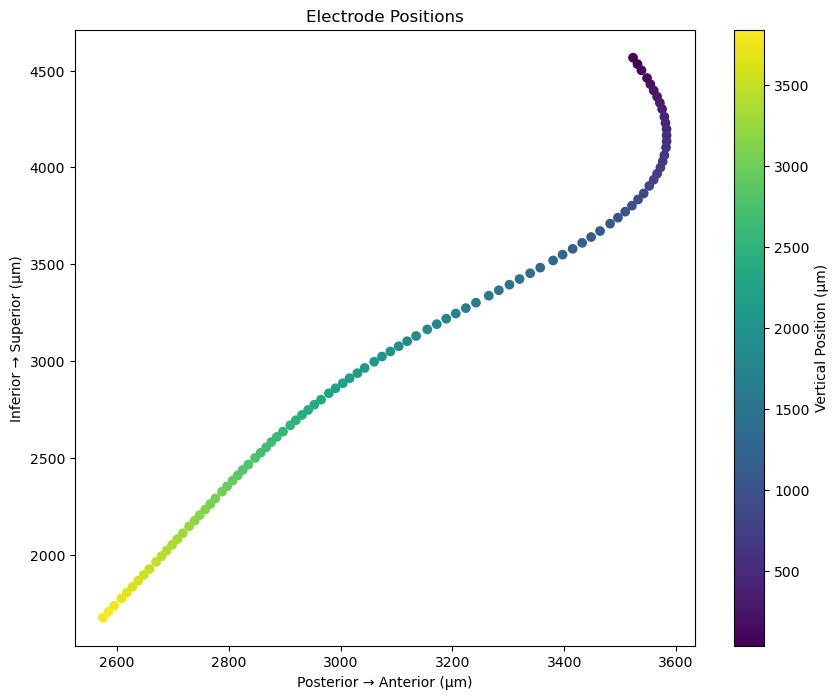

In [5]:
# Convert electrode table to pandas DataFrame and display summary
electrode_df = nwb.electrodes.to_dataframe()
print("\nElectrode count:", len(electrode_df))
print("\nUnique brain regions:")
print(electrode_df['location'].unique())

# Plot electrode positions
plt.figure(figsize=(10, 8))
plt.scatter(electrode_df['x'], electrode_df['y'], c=electrode_df['probe_vertical_position'])
plt.colorbar(label='Vertical Position (μm)')
plt.xlabel('Posterior → Anterior (μm)')
plt.ylabel('Inferior → Superior (μm)')
plt.title('Electrode Positions')
plt.show()

## Analyzing LFP Data

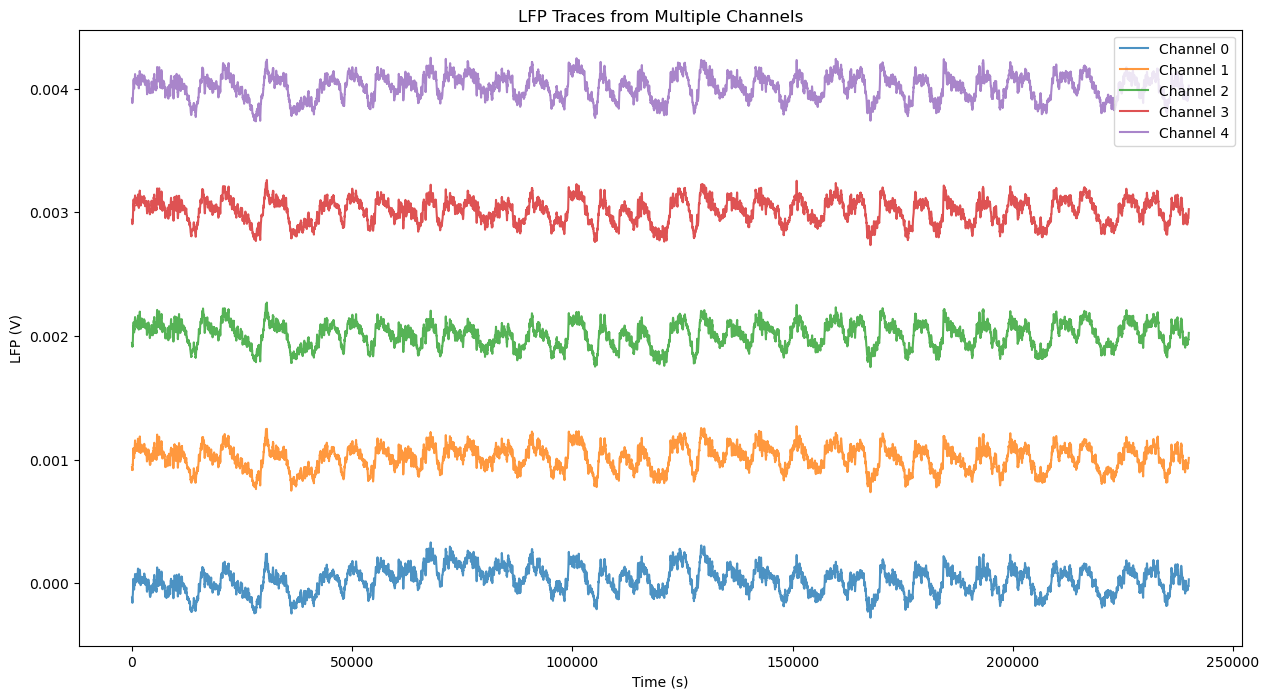

In [6]:
# Get LFP data
lfp = nwb.acquisition['probe_4_lfp_data']
sampling_rate = 625.0  # From probeF.lfp_sampling_rate

# Plot LFP traces for a subset of channels and time
time_slice = slice(0, 10000)  # First few seconds
channel_subset = slice(0, 5)   # First few channels

plt.figure(figsize=(15, 8))
time = lfp.timestamps[time_slice]
for i in range(channel_subset.stop):
    plt.plot(time, lfp.data[time_slice, i] + i*0.001, 
             label=f'Channel {i}', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.title('LFP Traces from Multiple Channels')
plt.legend()
plt.show()

## Computing LFP Power Spectrum

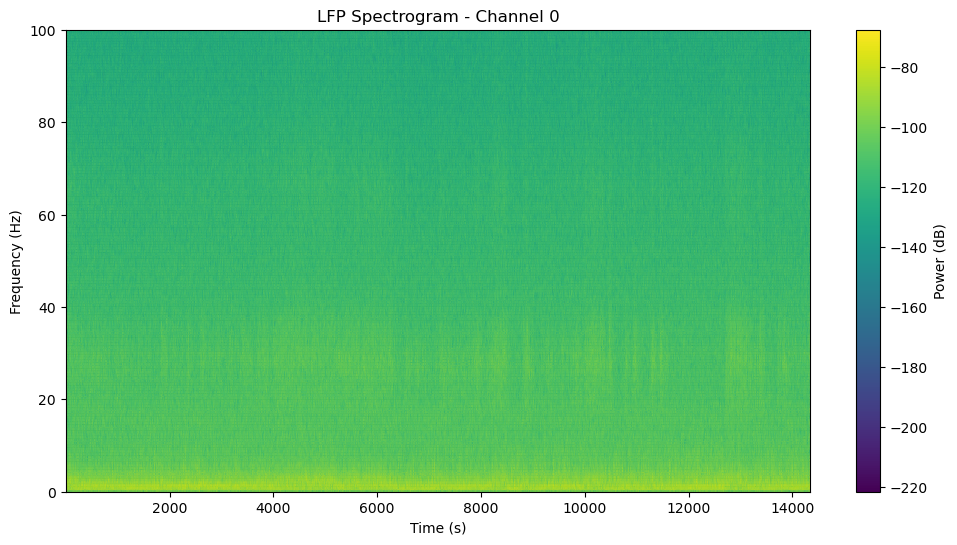

In [7]:
# Calculate power spectrum for one channel
from scipy import signal

# Select one channel and compute spectrogram
channel = 0
f, t, Sxx = signal.spectrogram(lfp.data[:, channel], 
                              fs=sampling_rate,
                              nperseg=1024,
                              noverlap=512)

plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'LFP Spectrogram - Channel {channel}')
plt.colorbar(label='Power (dB)')
plt.ylim(0, 100)  # Focus on lower frequencies
plt.show()

## Next Steps

This notebook demonstrated basic access and visualization of the LFP data from Dandiset 000690. Potential next analyses could include:

- Comparing LFP patterns across different brain regions
- Analyzing neural responses to specific visual stimuli
- Investigating relationships between different frequency bands
- Examining how visual information is transformed across brain regions